In [46]:
import pandas as pd
df=pd.read_csv('A2data.csv')

In [47]:
df

,Maths,Reading,Writing,Placement,Club_Join_Year,Placement_Count
0,78.0,89.0,68.0,79,2020,1
1,82.0,82.0,82.0,77,2018,1
2,87.0,NaN,60.0,82,2022,2
3,NaN,60.0,NaN,89,2023,2
4,85.0,72.0,63.0,89,2022,2
...,...,...,...,...,...,...
64,75.0,68.0,70.0,85,2020,2
65,60.0,75.0,82.0,77,2022,4
66,84.0,NaN,NaN,100,2020,3
67,64.0,68.0,139.0,95,2020,3


General information

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Maths            63 non-null     float64
 1   Reading          58 non-null     float64
 2   Writing          51 non-null     float64
 3   Placement        69 non-null     int64  
 4   Club_Join_Year   69 non-null     int64  
 5   Placement_Count  69 non-null     int64  
dtypes: float64(3), int64(3)
memory usage: 3.4 KB


In [49]:
df.describe()

,Maths,Reading,Writing,Placement,Club_Join_Year,Placement_Count
count,63.000000,58.000000,51.000000,69.000000,69.000000,69.000000
mean,75.825397,80.810345,85.156863,88.188406,2020.623188,2.521739
std,13.136430,17.049419,37.900592,7.902485,1.618836,0.994229
min,60.000000,60.000000,60.000000,75.000000,2018.000000,1.000000
25%,66.500000,72.250000,66.500000,81.000000,2019.000000,2.000000
50%,75.000000,79.500000,75.000000,89.000000,2021.000000,3.000000
75%,82.000000,84.750000,84.500000,95.000000,2022.000000,3.000000
max,144.000000,155.000000,280.000000,100.000000,2023.000000,6.000000


Checking out missing values

In [50]:
df.isnull().sum()

Maths               6
Reading            11
Writing            18
Placement           0
Club_Join_Year      0
Placement_Count     0
dtype: int64

Dealing wiht missing values

1)For Maths column, we will drop the rows

In [59]:
import numpy as np
df.drop(df.index[df['Maths'].isna()], inplace=True)

In [60]:
df

,Maths,Reading,Writing,Placement,Club_Join_Year,Placement_Count
0,78.0,89.0,68.0,79,2020,1
1,82.0,82.0,82.0,77,2018,1
2,87.0,NaN,60.0,82,2022,2
4,85.0,72.0,63.0,89,2022,2
5,60.0,NaN,63.0,99,2021,3
...,...,...,...,...,...,...
64,75.0,68.0,70.0,85,2020,2
65,60.0,75.0,82.0,77,2022,4
66,84.0,NaN,NaN,100,2020,3
67,64.0,68.0,139.0,95,2020,3


In [61]:
df['Maths'].isnull().sum()

0

2)For Reading column we will replace null values by 75

In [62]:
df['Reading'].replace(to_replace=np.nan,value=75,inplace=True)

In [63]:
print(df)

    Maths  Reading  Writing  Placement  Club_Join_Year  Placement_Count
0    78.0     89.0     68.0         79            2020                1
1    82.0     82.0     82.0         77            2018                1
2    87.0     75.0     60.0         82            2022                2
4    85.0     72.0     63.0         89            2022                2
5    60.0     75.0     63.0         99            2021                3
..    ...      ...      ...        ...             ...              ...
64   75.0     68.0     70.0         85            2020                2
65   60.0     75.0     82.0         77            2022                4
66   84.0     75.0      NaN        100            2020                3
67   64.0     68.0    139.0         95            2020                3
68   76.0    155.0     86.0         91            2020                3

[63 rows x 6 columns]


In [64]:
df['Reading'].isnull().sum()

0

3)For Wriitng we will take out mean and will use fillna method

In [65]:
m=df['Writing'].mean()

In [66]:
m

85.91489361702128

In [68]:
df['Writing'].fillna(value=m,inplace=True)

In [69]:
df['Writing'].isnull().sum()

0

In [70]:
print(df)

    Maths  Reading     Writing  Placement  Club_Join_Year  Placement_Count
0    78.0     89.0   68.000000         79            2020                1
1    82.0     82.0   82.000000         77            2018                1
2    87.0     75.0   60.000000         82            2022                2
4    85.0     72.0   63.000000         89            2022                2
5    60.0     75.0   63.000000         99            2021                3
..    ...      ...         ...        ...             ...              ...
64   75.0     68.0   70.000000         85            2020                2
65   60.0     75.0   82.000000         77            2022                4
66   84.0     75.0   85.914894        100            2020                3
67   64.0     68.0  139.000000         95            2020                3
68   76.0    155.0   86.000000         91            2020                3

[63 rows x 6 columns]


Outliers 
Detecting oultliers with help of box plot

<Axes: >

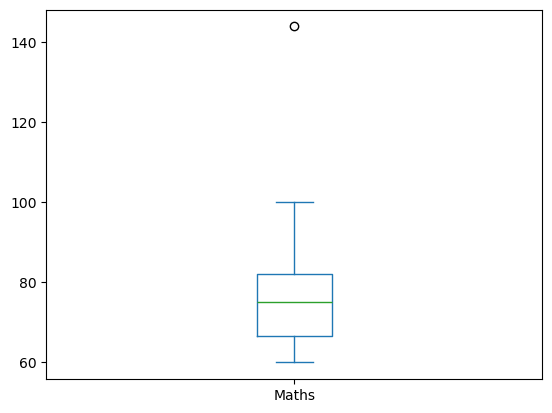

In [73]:
df['Maths'].plot.box()

In the above plot circle reprsents the oulier value, value aboe 120 are outliers. Let's remove it 

In [81]:
df=df[df['Maths']<=120]

<Axes: >

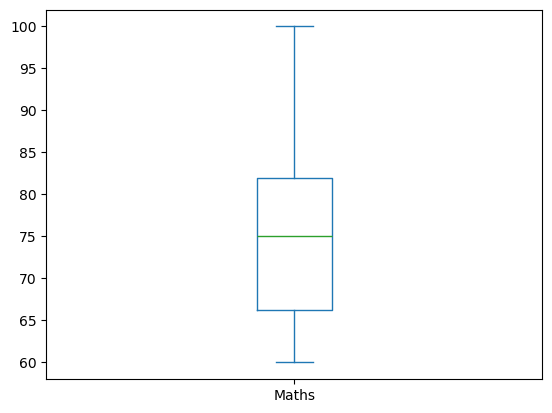

In [82]:
df['Maths'].plot.box()

Now, there is no outlier in the Maths Column

For Reading and Writing column also , we will go for box plot

In [83]:
import matplotlib.pyplot as plt

<Axes: >

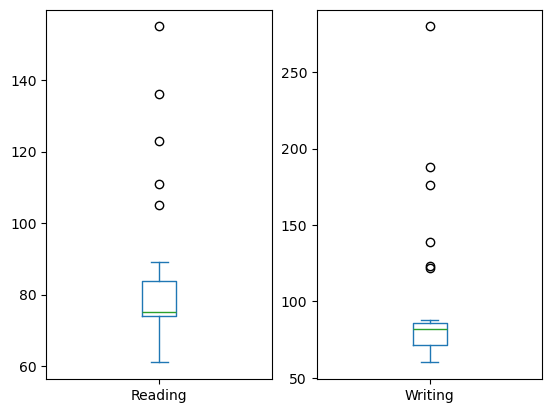

In [84]:
plt.subplot(1,2,1)
df['Reading'].plot.box()
plt.subplot(1,2,2)
df['Writing'].plot.box()

Here outlier for reading and writing col is above 100. Let's remove them

In [85]:
df=df[df['Reading']<=100]
df=df[df['Writing']<=100]

<Axes: >

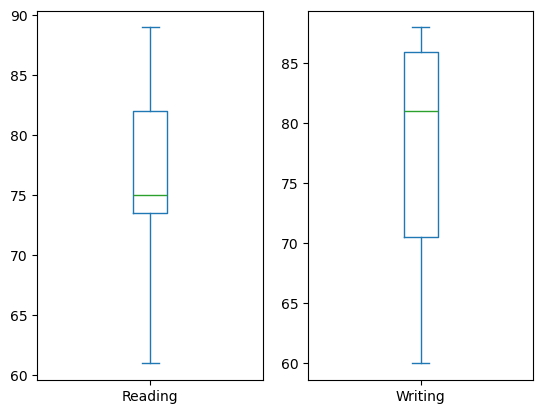

In [86]:
plt.subplot(1,2,1)
df['Reading'].plot.box()
plt.subplot(1,2,2)
df['Writing'].plot.box()

Placement_Count is dependent on Placement column . So, let's use scatter() function 

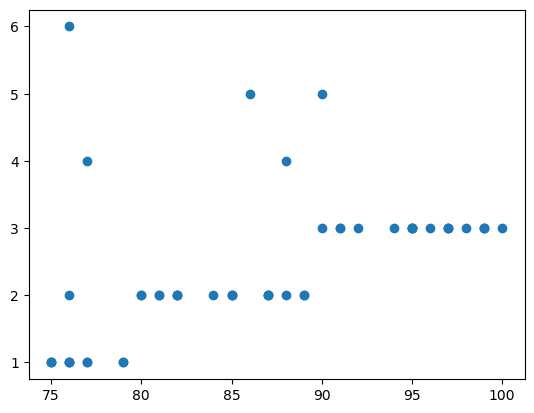

In [87]:
plt.scatter(df['Placement'],df['Placement_Count'])

Looking at the plot ,we can say that Placement_Count of 4 and above is outlier. So, let's remove it 

In [90]:
df=df[df['Placement_Count']<4]

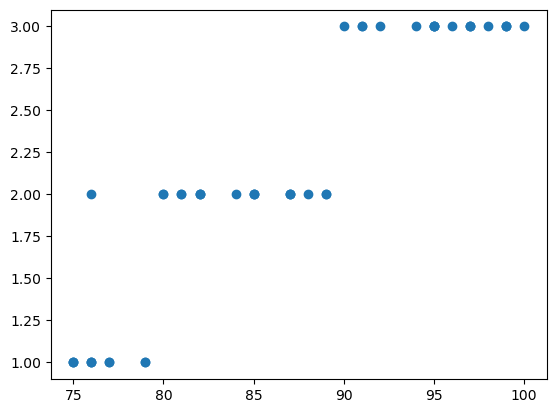

In [91]:
plt.scatter(df['Placement'],df['Placement_Count'])